# Loan Default Prediction

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Loan_Default_New.xlsx',index_col="Unnamed: 0")  #loading the dataset

In [3]:
data

ID  year loan_limit             Gender approv_in_adv loan_type  \
12313    37203  2019         cf             Female         nopre     type1   
30909    55799  2019         cf  Sex Not Available         nopre     type1   
89848   114738  2019         cf  Sex Not Available           pre     type1   
53598    78488  2019         cf             Female         nopre     type1   
91578   116468  2019         cf  Sex Not Available         nopre     type2   
26122    51012  2019         cf              Joint         nopre     type3   
16661    41551  2019        ncf               Male           pre     type1   
12499    37389  2019         cf               Male         nopre     type1   
52364    77254  2019         cf               Male           pre     type1   
90806   115696  2019         cf               Male         nopre     type1   
133205  158095  2019         cf               Male         nopre     type1   
105372  130262  2019         cf  Sex Not Available         nopre     type1   
136874  161764  2019         cf               Male         nopre     type2   
7158     32048  2019         cf  Sex Not Available           pre     type1   
123890  148780  2019         cf              Joint         nopre     type1   
54525    79415  2019         cf               Male         nopre     type3   
107458  132348  2019         cf  Sex Not Available         nopre     type2   
94067   118957  2019         cf               Male           pre     type1   
53732    78622  2019         cf               Male           pre     type3   
26973    51863  2019         cf  Sex Not Available         nopre     type1   
37122    62012  2019        NaN              Joint         nopre     type1   
134344  159234  2019         cf  Sex Not Available         nopre     type1   
103205  128095  2019         cf  Sex Not Available         nopre     type1   
143102  167992  2019         cf  Sex Not Available         nopre     type1   
29625    54515  2019         cf             Female         nopre     type1   
137628  162518  2019         cf              Joint         nopre     type1   
146659  171549  2019         cf               Male         nopre     type1   
145121  170011  2019         cf  Sex Not Available         nopre     type1   
98755   123645  2019         cf  Sex Not Available         nopre     type1   
76836   101726  2019        ncf             Female         nopre     type1   
...        ...   ...        ...                ...           ...       ...   
139989  164879  2019         cf               Male         nopre     type1   
129426  154316  2019         cf              Joint         nopre     type1   
8725     33615  2019         cf               Male         nopre     type3   
97177   122067  2019        NaN              Joint         nopre     type1   
81689   106579  2019         cf              Joint         nopre     type1   
104971  129861  2019         cf               Male         nopre     type1   
30419    55309  2019         cf              Joint         nopre     type1   
2494     27384  2019         cf             Female         nopre     type1   
137687  162577  2019         cf  Sex Not Available         nopre     type1   
129895  154785  2019        ncf              Joint         nopre     type1   
82711   107601  2019        ncf               Male         nopre     type1   
102698  127588  2019         cf  Sex Not Available         nopre     type1   
70720    95610  2019         cf              Joint         nopre     type3   
31017    55907  2019        ncf               Male         nopre     type1   
96308   121198  2019        ncf  Sex Not Available           pre     type1   
108342  133232  2019         cf              Joint         nopre     type2   
1159     26049  2019         cf  Sex Not Available         nopre     type3   
91703   116593  2019         cf  Sex Not Available         nopre     type1   
98857   123747  2019         cf               Male         nopre     type1   
30615    55505  2019         cf   

In [4]:
#Features
#ID = Customer ID of Applicant
#year = Year of Application
#loan limit = maximum avaliable amount of the loan allowed to be taken
#Gender = sex type
#approv_in_adv = Is loan pre-approved or not
#loan_type = Type of loan
#loan_purpose = the reason you want to borrow money
#Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
#open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
#business_or_commercial = Usage type of the loan amount
#loan_amount = The exact loan amount
#rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
#Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
#Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
#term = the loan's repayment period
#Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
#interest_only = amount of interest only without principles
#lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
#property_value = the present worth of future benefits arising from the ownership of the property
#construction_type = Collateral construction type
#occupancy_type = classifications refer to categorizing structures based on their usage
#Secured_by = Type of Collatoral
#total_units = number of unites
#income = refers to the amount of money, property, and other transfers of value received over a set period of time
#credit_type = type of credit
#co-applicant_credit_type =  is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
#age = applicant's age
#submission_of_application = Ensure the application is complete or not
#LTV = life-time value (LTV) is a prognostication of the net profit
#Region = applicant's place
#Security_Type = Type of Collatoral
#status = Loan status (Approved/Declined)
#dtir1 = debt-to-income ratio







In [5]:
df=data

# Handing Missing Values

In [6]:
# Missing values for numerical data
df['rate_of_interest']= df['rate_of_interest'].fillna(df['rate_of_interest'].mean())
df['Interest_rate_spread']=df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean())
df['Upfront_charges']=df['Upfront_charges'].fillna(df['Upfront_charges'].mean())
df['term']=df['term'].fillna(df['term'].mean())
df['property_value']=df['property_value'].fillna(df['property_value'].mean())
df['income']=df['income'].fillna(df['income'].mean())
df['LTV']=df['LTV'].fillna(df['LTV'].mean())
df['dtir1']=df['dtir1'].fillna(df['dtir1'].mean())

In [7]:
#categorical data
df['loan_limit']=df['loan_limit'].fillna(df['loan_limit'].mode()[0])
df['approv_in_adv']=df['approv_in_adv'].fillna(df['approv_in_adv'].mode()[0])
df['Neg_ammortization']=df['Neg_ammortization'].fillna(df['Neg_ammortization'].mode()[0])
df['loan_purpose']=df['loan_purpose'].fillna(df['loan_purpose'].mode()[0])
df['age']=df['age'].fillna(df['age'].mode()[0])
df['submission_of_application']=df['submission_of_application'].fillna(df['submission_of_application'].mode()[0])

In [8]:
df.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [9]:
num_col=['loan_amount','rate_of_interest','term','property_value','income','Credit_Score','LTV','dtir1']

In [10]:
cat_col=df.drop(num_col,axis=1)

In [11]:
cat_col.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'Interest_rate_spread', 'Upfront_charges',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type', 'Status'],
      dtype='object')

# Outlier Detection

In [12]:
def Outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=(df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
    return df_final.sum()

In [13]:
X1_num=df.drop(cat_col,axis=1)

In [14]:
Outlier_IQR(X1_num)

loan_amount          120
rate_of_interest     455
term                1859
property_value       454
income               507
Credit_Score           0
LTV                  322
dtir1                447
dtype: int64

In [15]:
pd.DataFrame(Outlier_IQR(X1_num))

0
loan_amount        120
rate_of_interest   455
term              1859
property_value     454
income             507
Credit_Score         0
LTV                322
dtir1              447

In [16]:
def plot_Outliers(X1_num,height):
    '''
    this function plots outliers as bars and appends text of missing values on the bar
    '''
    f,ax = plt.subplots(1,1,figsize=(25,20))
    na_df = pd.DataFrame(Outlier_IQR(X1_num)).reset_index()
    na_df.columns=['Columns','Outliers']
    sns.barplot(data=na_df, x='Columns',y='Outliers',edgecolor='white', linewidth=1,palette='dark')
    ax.tick_params('x',labelrotation=100)
    for i in na_df.index:
        ax.text(x=i,y=na_df['Outliers'][i]+height, s=na_df['Outliers'][i],ha="center", va="center", color="black",rotation=25,size=18)
    f.suptitle('Plot Of Outliers',y=0.98,ha='center',va='center',size=15, weight=150)
    plt.show()

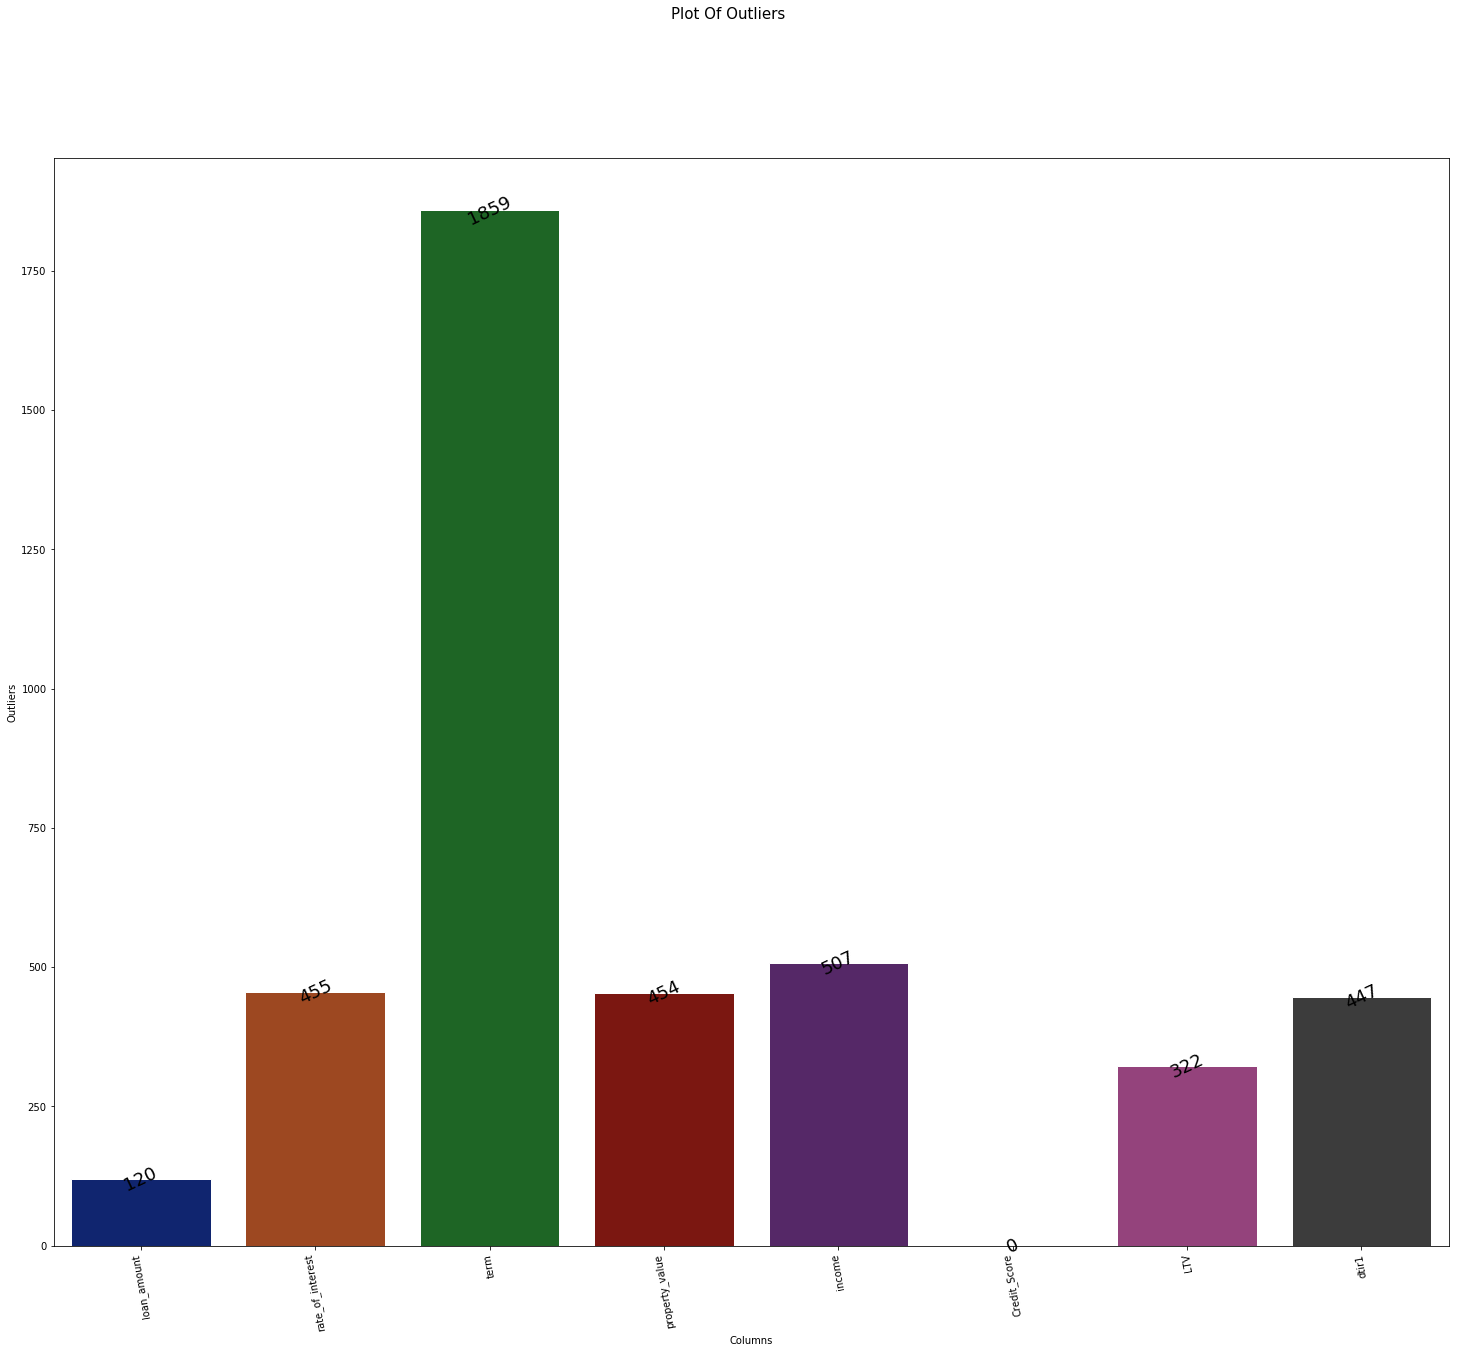

In [17]:
plot_Outliers(X1_num,0)

# EDA For Numerical Columns(Normalize if the data is skewed)

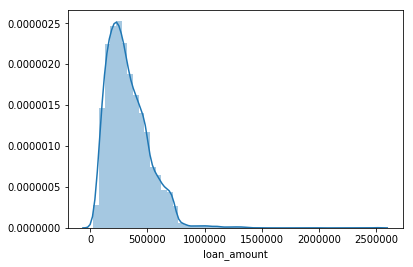

In [18]:
sns.distplot(df["loan_amount"])

In [19]:
df["loan_amount_log"]=np.log(df["loan_amount"]) # loan amount is right-skewed so normalize using log function

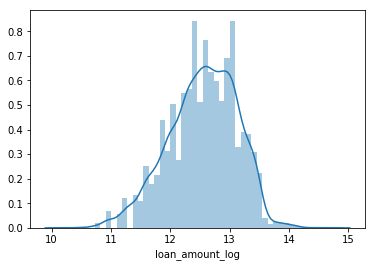

In [20]:
sns.distplot(df["loan_amount_log"])

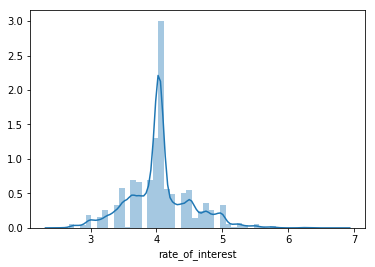

In [21]:
sns.distplot(df["rate_of_interest"])

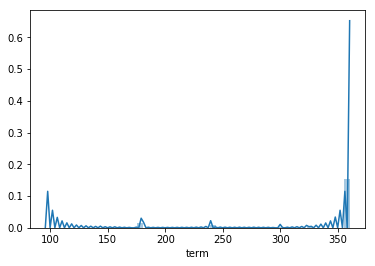

In [22]:
sns.distplot(df["term"])

In [23]:
df["term_log"]=np.log(df["term"])    

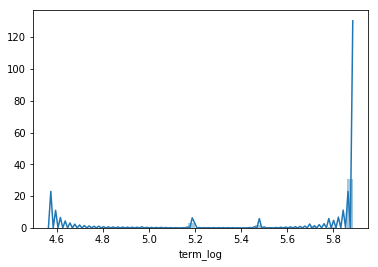

In [24]:
sns.distplot(df["term_log"])

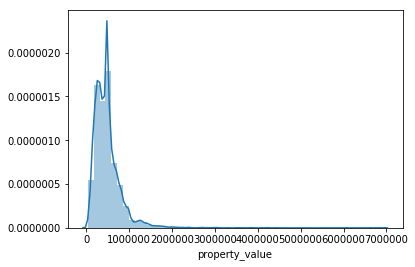

In [25]:
sns.distplot(df["property_value"])

In [26]:
df["property_value_log"]=np.log(df["property_value"]) # property-value is right-skewed so normalize using log function

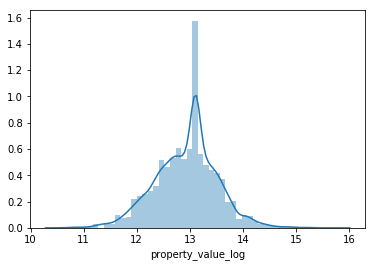

In [27]:
sns.distplot(df["property_value_log"])

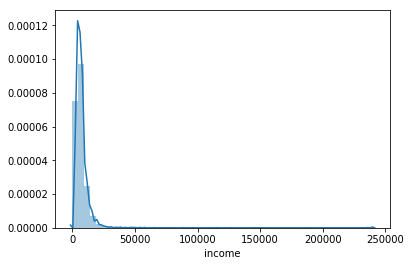

In [28]:
sns.distplot(df["income"])

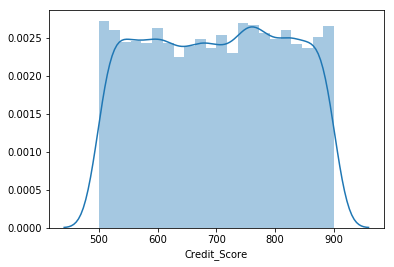

In [29]:
sns.distplot(df["Credit_Score"])

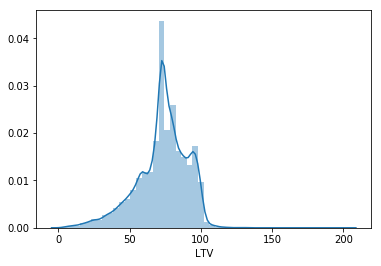

In [30]:
sns.distplot(df["LTV"])

In [31]:
df["LTV_log"]=np.log(df["LTV"])    # LTV is right-skewed so normalize using log function

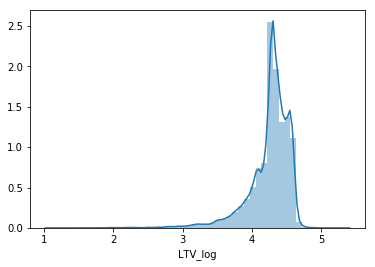

In [32]:
sns.distplot(df["LTV_log"])

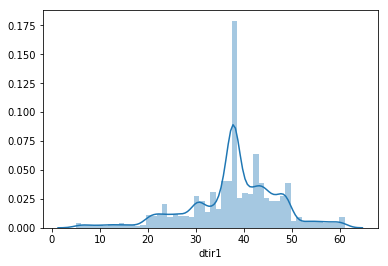

In [33]:
sns.distplot(df["dtir1"])

# BIVARIATE ANALYSIS¶

In [34]:
data.corr()

ID  year  loan_amount  rate_of_interest  \
ID                    1.000000   NaN    -0.003203         -0.001418   
year                       NaN   NaN          NaN               NaN   
loan_amount          -0.003203   NaN     1.000000         -0.120900   
rate_of_interest     -0.001418   NaN    -0.120900          1.000000   
Interest_rate_spread  0.004214   NaN    -0.310565          0.600798   
Upfront_charges      -0.005966   NaN     0.070695         -0.089727   
term                 -0.011507   NaN     0.169261          0.185097   
property_value        0.000258   NaN     0.688251         -0.121979   
income                0.008787   NaN     0.463130         -0.029130   
Credit_Score         -0.020940   NaN     0.009115          0.007203   
LTV                  -0.019928   NaN     0.069928          0.005551   
Status                0.017240   NaN    -0.042900          0.002502   
dtir1                -0.003275   NaN     0.014613          0.038548   
loan_amount_log      -0.004112   NaN     0.926399         -0.155342   
term_log             -0.011646   NaN     0.168018          0.188252   
property_value_log    0.005861   NaN     0.755036         -0.152201   
LTV_log              -0.022441   NaN     0.093270         -0.001090   

                      Interest_rate_spread  Upfront_charges      term  \
ID                            4.213897e-03        -0.005966 -0.011507   
year                                   NaN              NaN       NaN   
loan_amount                  -3.105652e-01         0.070695  0.169261   
rate_of_interest              6.007981e-01        -0.089727  0.185097   
Interest_rate_spread          1.000000e+00         0.012323 -0.136538   
Upfront_charges               1.232279e-02         1.000000 -0.055050   
term                         -1.365382e-01        -0.055050  1.000000   
property_value               -3.051796e-01         0.058589  0.050308   
income                       -1.163330e-01         0.015769 -0.052796   
Credit_Score                  6.166444e-04         0.000359 -0.005809   
LTV                           7.689506e-02        -0.058871  0.193033   
Status                       -6.383617e-16        -0.001059 -0.006160   
dtir1                         4.401567e-02        -0.003239  0.096564   
loan_amount_log              -3.673399e-01         0.067861  0.193654   
term_log                     -1.293405e-01        -0.054856  0.995418   
property_value_log           -3.930471e-01         0.082242  0.074208   
LTV_log                       5.883374e-02        -0.028720  0.168761   

                      property_value    income  Credit_Score       LTV  \
ID                          0.000258  0.008787     -0.020940 -0.019928   
year                             NaN       NaN           NaN       NaN   
loan_amount                 0.688251  0.463130      0.009115  0.069928   
rate_of_interest           -0.121979 -0.029130      0.007203  0.005551   
Interest_rate_spread       -0.305180 -0.116333      0.000617  0.076895   
Upfront_charges             0.058589  0.015769      0.000359 -0.058871   
term                        0.050308 -0.052796     -0.005809  0.193033   
property_value              1.000000  0.376601      0.000107 -0.434318   
income                      0.376601  1.000000      0.001980 -0.045550   
Credit_Score                0.000107  0.001980      1.000000 -0.007158   
LTV                        -0.434318 -0.045550     -0.007158  1.000000   
Status                     -0.043159 -0.062046     -0.001216  0.066116   
dtir1                      -0.044087 -0.259063      0.010526  0.141606   
loan_amount_log             0.621657  0.411735      0.004724  0.118779   
term_log                    0.048988 -0.054564     -0.005883  0.194744   
property_value_log          0.867392  0.370570     -0.001163 -0.397953   
LTV_log                    -0.474379 -0.037378     -0.000217  0.954096   

                            Status     dtir1  loan_amount_log  term_log  \
ID                    1.72

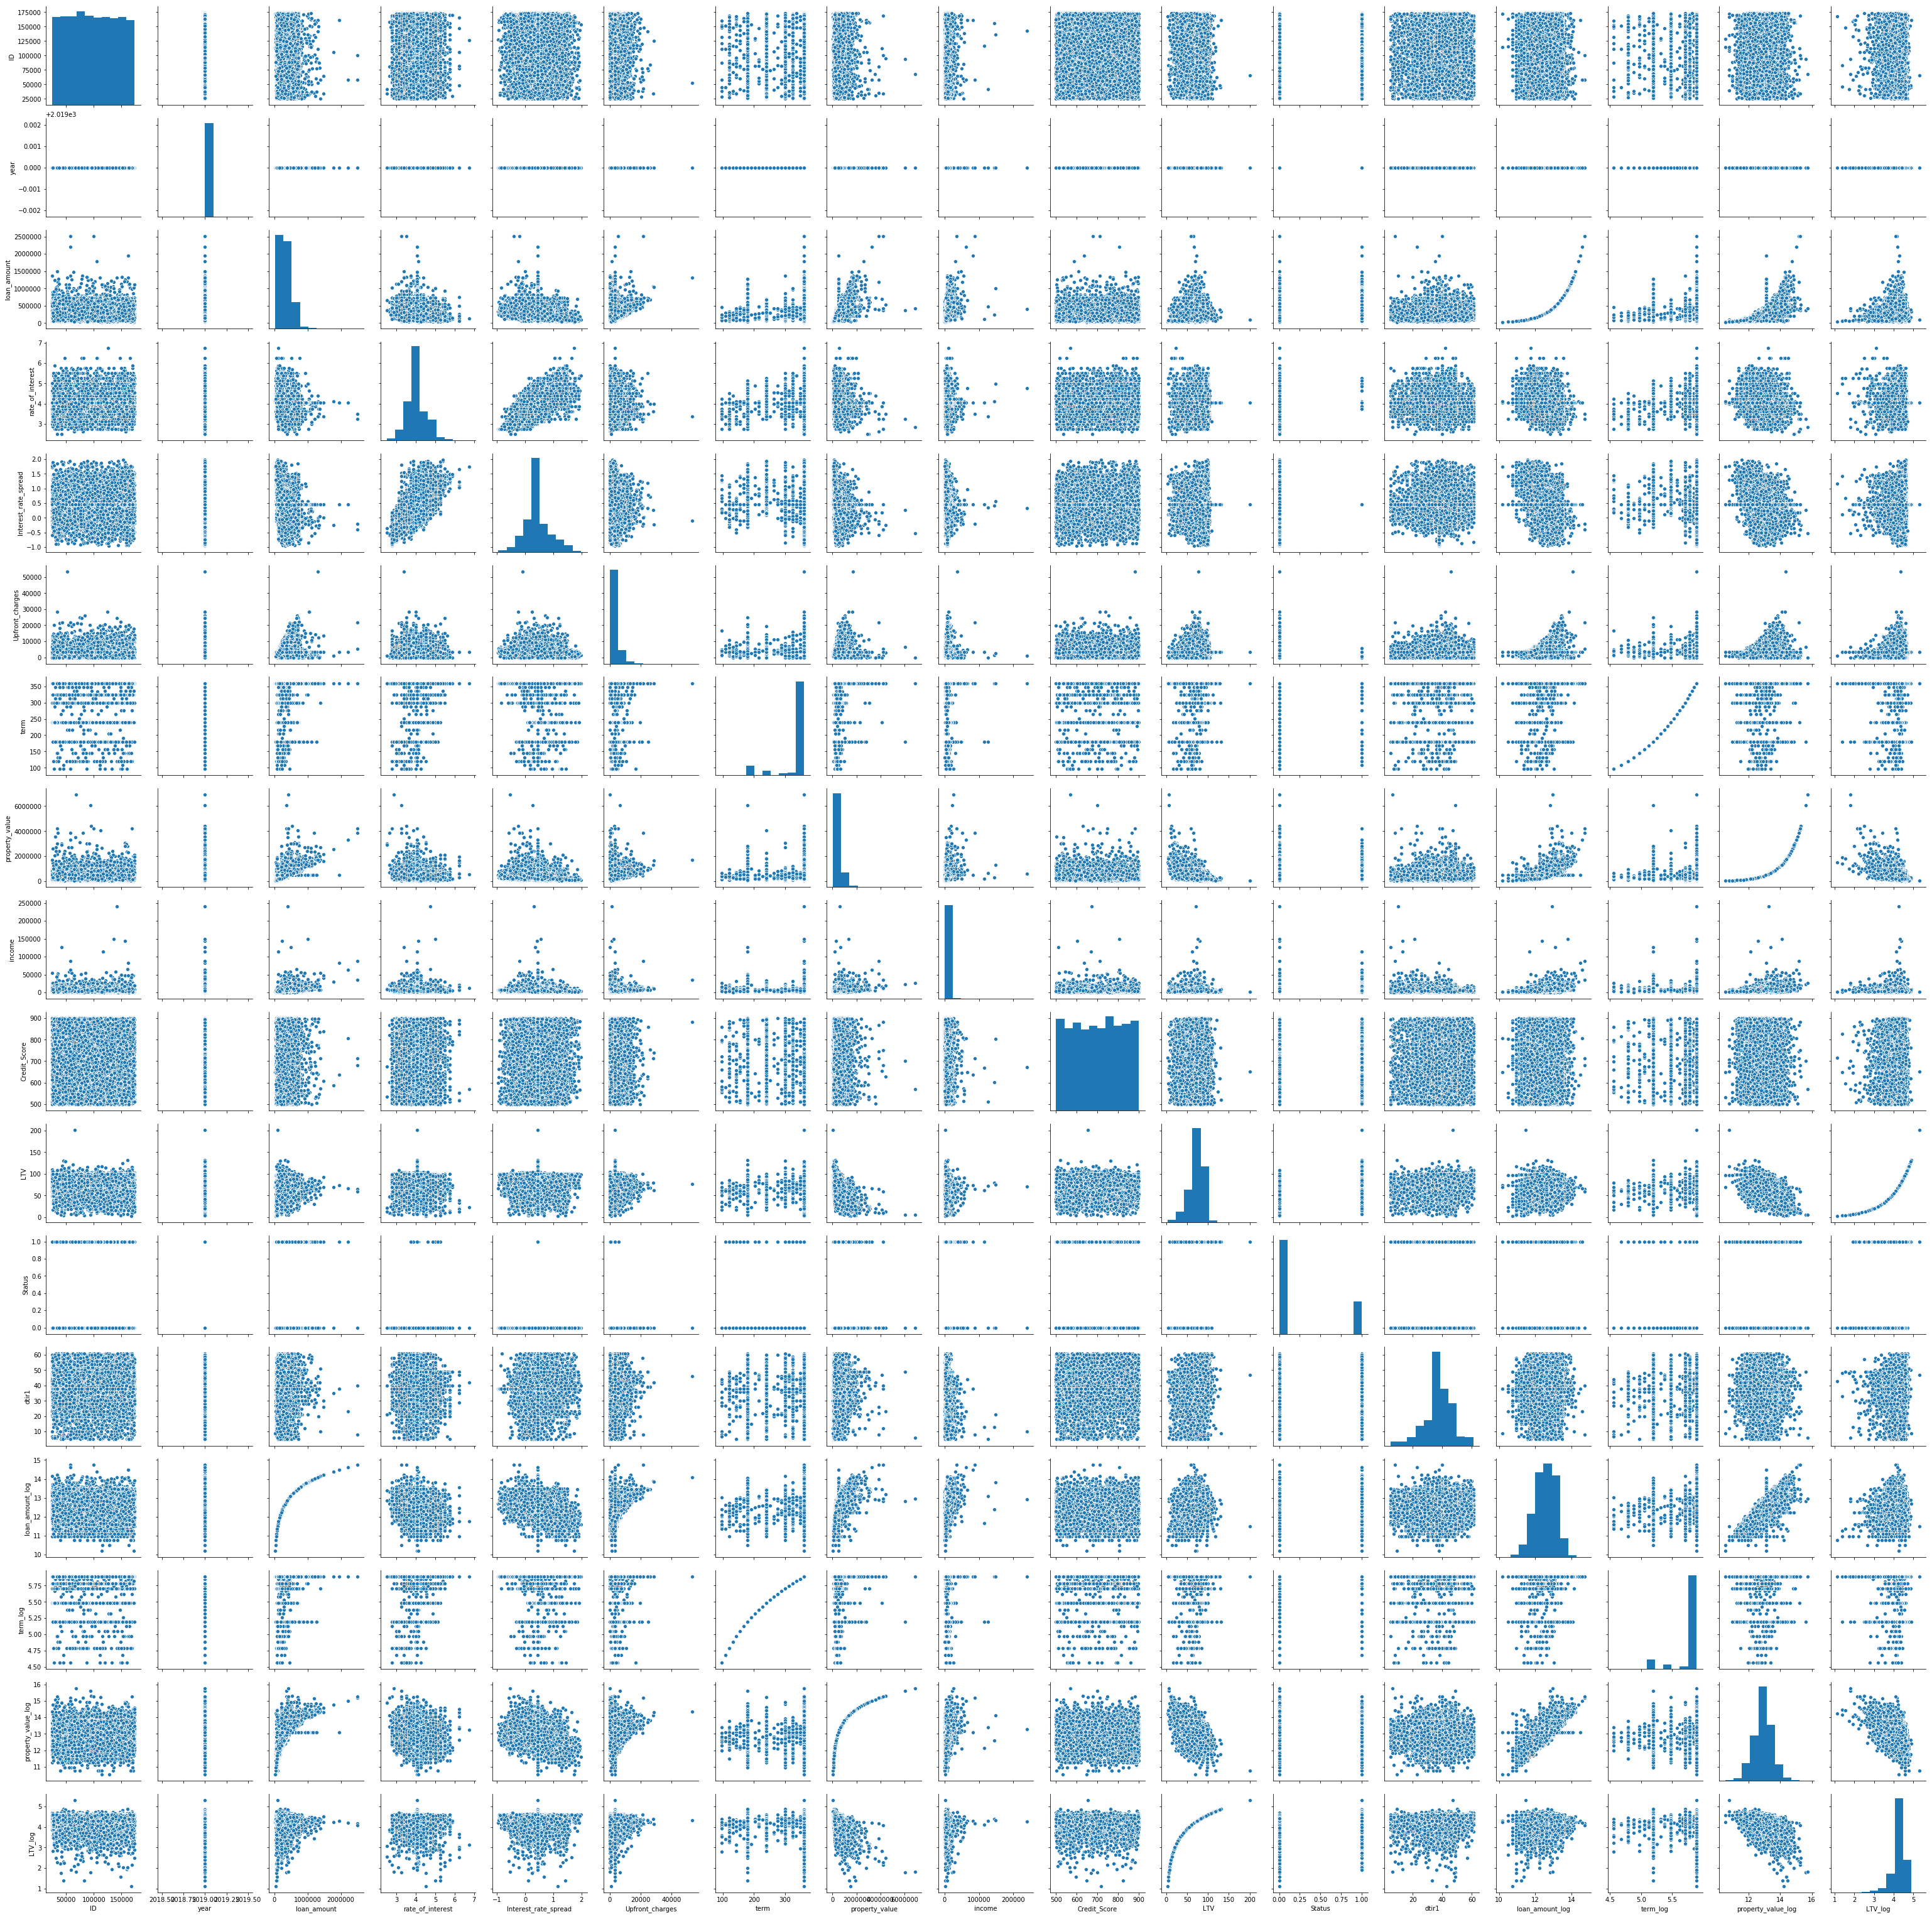

In [35]:
sns.pairplot(data)
plt.show()

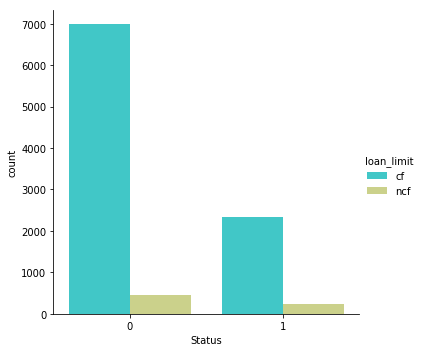

In [36]:
sns.catplot(x = 'Status', hue = 'loan_limit', data =data, kind ='count',palette ='rainbow')
plt.show()

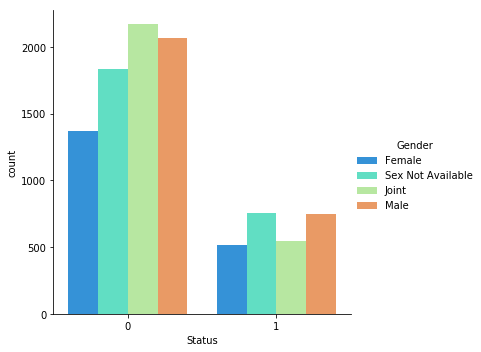

In [37]:
sns.catplot(x = 'Status', hue = 'Gender', data =data, kind ='count',palette ='rainbow')
plt.show()

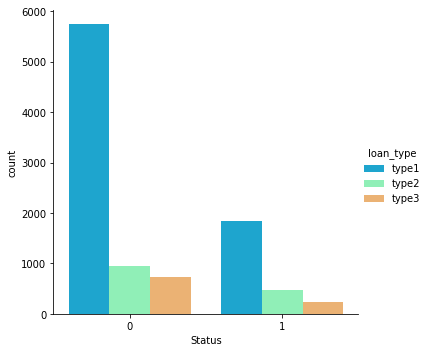

In [38]:
sns.catplot(x = 'Status', hue = 'loan_type', data =data, kind ='count',palette ='rainbow')
plt.show()

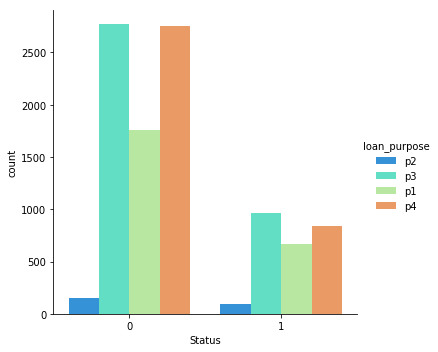

In [39]:
sns.catplot(x = 'Status', hue = 'loan_purpose', data =data, kind ='count',palette ='rainbow')
plt.show()

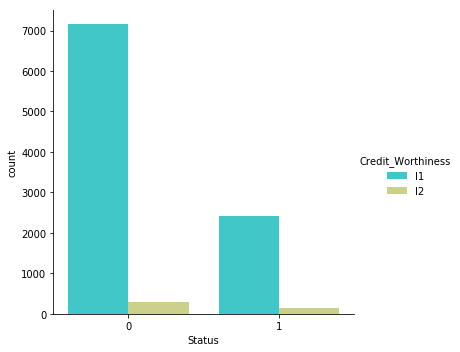

In [40]:
sns.catplot(x = 'Status', hue = 'Credit_Worthiness', data =data, kind ='count',palette ='rainbow')
plt.show()

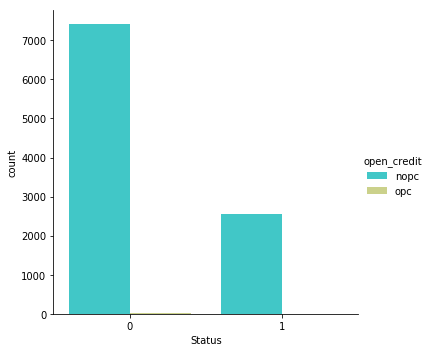

In [41]:
sns.catplot(x = 'Status', hue = 'open_credit', data =data, kind ='count',palette ='rainbow')
plt.show()

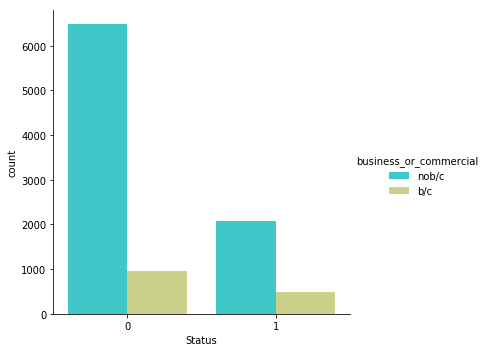

In [42]:
sns.catplot(x = 'Status', hue = 'business_or_commercial', data =data, kind ='count',palette ='rainbow')
plt.show()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 12313 to 71285
Data columns (total 38 columns):
ID                           10000 non-null int64
year                         10000 non-null int64
loan_limit                   10000 non-null object
Gender                       10000 non-null object
approv_in_adv                10000 non-null object
loan_type                    10000 non-null object
loan_purpose                 10000 non-null object
Credit_Worthiness            10000 non-null object
open_credit                  10000 non-null object
business_or_commercial       10000 non-null object
loan_amount                  10000 non-null int64
rate_of_interest             10000 non-null float64
Interest_rate_spread         10000 non-null float64
Upfront_charges              10000 non-null float64
term                         10000 non-null float64
Neg_ammortization            10000 non-null object
interest_only                10000 non-null object
lump_sum_payment   

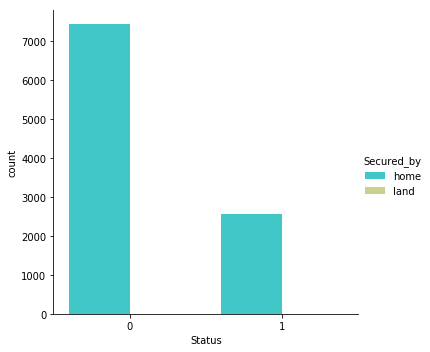

In [45]:
sns.catplot(x = 'Status', hue = 'Secured_by', data =data, kind ='count',palette ='rainbow')
plt.show()

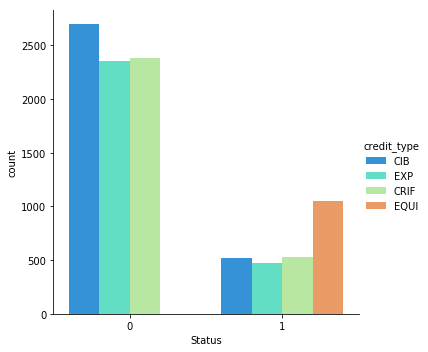

In [46]:
sns.catplot(x = 'Status', hue = 'credit_type', data =data, kind ='count',palette ='rainbow')
plt.show()

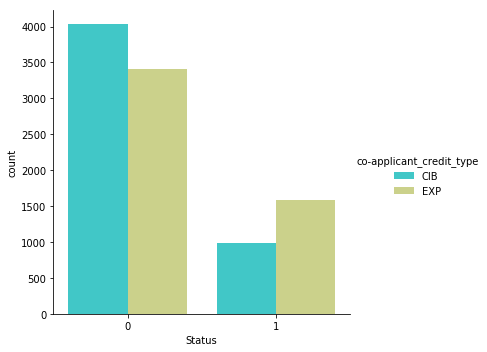

In [47]:
sns.catplot(x = 'Status', hue = 'co-applicant_credit_type', data =data, kind ='count',palette ='rainbow')
plt.show()

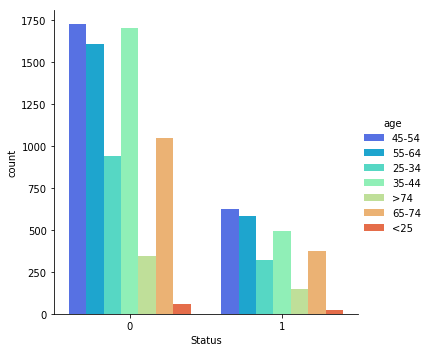

In [48]:
sns.catplot(x = 'Status', hue = 'age', data =data, kind ='count',palette ='rainbow')
plt.show()

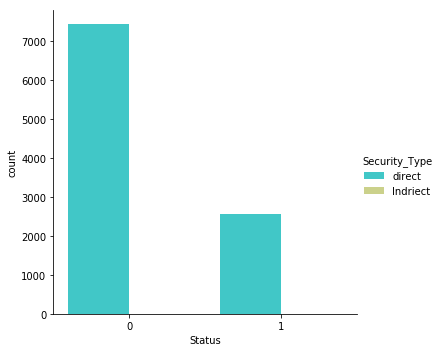

In [49]:
sns.catplot(x = 'Status', hue = 'Security_Type', data =data, kind ='count',palette ='rainbow')
plt.show()

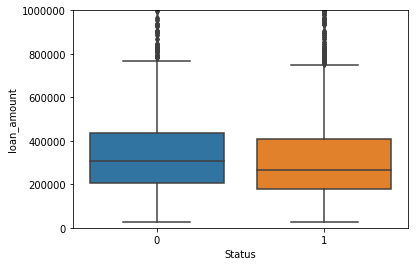

In [50]:
sns.boxplot(x='Status', y='loan_amount', data=data)
plt.ylim(0,1000000)
plt.show()

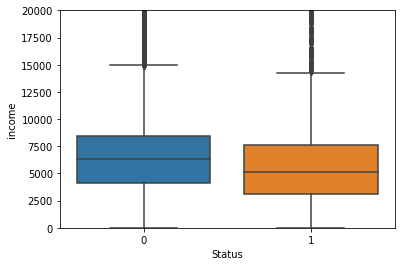

In [51]:
sns.boxplot(x='Status', y='income', data=data)
plt.ylim(0,20000)
plt.show()

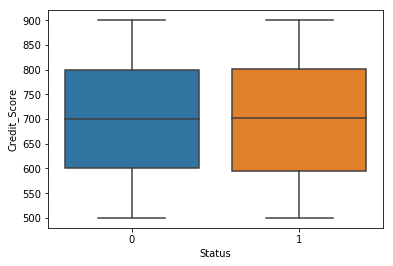

In [52]:
sns.boxplot(x='Status', y='Credit_Score', data=data)
plt.show()

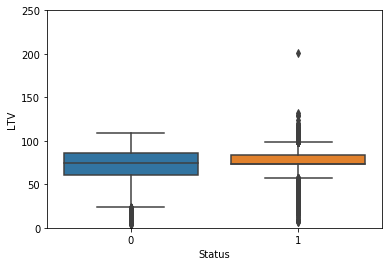

In [53]:
sns.boxplot(x='Status', y='LTV', data=data)
plt.ylim(0,250)
plt.show()

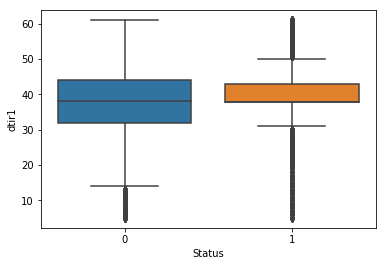

In [54]:
sns.boxplot(x='Status', y='dtir1', data=data)
plt.show()

In [34]:
df.drop(["loan_amount","term","property_value","LTV"],axis=1,inplace=True)

In [35]:
df

ID  year loan_limit             Gender approv_in_adv loan_type  \
140346  165236  2019         cf               Male           pre     type1   
97327   122217  2019         cf  Sex Not Available         nopre     type1   
114279  139169  2019         cf               Male         nopre     type3   
74224    99114  2019         cf              Joint         nopre     type1   
84539   109429  2019         cf              Joint         nopre     type1   
...        ...   ...        ...                ...           ...       ...   
23931    48821  2019         cf  Sex Not Available         nopre     type1   
113883  138773  2019         cf               Male         nopre     type1   
20313    45203  2019         cf  Sex Not Available         nopre     type1   
89847   114737  2019         cf  Sex Not Available           pre     type1   
76212   101102  2019         cf  Sex Not Available         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
140346           p1                l1        nopc                  nob/c  ...   
97327            p4                l1        nopc                  nob/c  ...   
114279           p4                l1        nopc                  nob/c  ...   
74224            p1                l1        nopc                  nob/c  ...   
84539            p4                l1        nopc                  nob/c  ...   
...             ...               ...         ...                    ...  ...   
23931            p1                l1        nopc                  nob/c  ...   
113883           p3                l1        nopc                  nob/c  ...   
20313            p3                l1        nopc                  nob/c  ...   
89847            p1                l1        nopc                  nob/c  ...   
76212            p3                l1        nopc                  nob/c  ...   

          age  submission_of_application  Region Security_Type Status  \
140346  25-34                    to_inst   North        direct      0   
97327   55-64                    to_inst   south        direct      0   
114279  55-64                   not_inst   south        direct      0   
74224   45-54                    to_inst   south        direct      0   
84539   35-44                   not_inst   south        direct      0   
...       ...                        ...     ...           ...    ...   
23931   55-64                    to_inst   south        direct      0   
113883  35-44                    to_inst   south        direct      0   
20313   55-64                    to_inst   south        direct      0   
89847   65-74                    to_inst   south        direct      1   
76212   65-74                    to_inst   south        direct      1   

            dtir1 loan_amount_log  term_log property_value_log   LTV_log  
140346  30.000000       12.665079  5.886104          12.700769  4.569480  
97327   21.000000       12.022751  5.192957          13.396960  3.230961  
114279  37.736328       12.665079  5.886104          13.157731  4.112518  
74224   40.000000       12.915339  5.886104          13.843126  3.677384  
84539   44.000000       12.755638  5.480639          13.729953  3.630856  
...           ...             ...       ...                ...       ...  
23931   48.000000       12.415117  5.886104          12.570716  4.449572  
113883  20.000000       12.022751  5.886104          12.245293  4.382627  
20313   44.000000       11.575900  5.886104          11.759786  4.421285  
89847   42.000000       11.824080  5.886104          11.904968  4.524283  
76212   54.000000       12.811754  5.886104          13.396960  4.019964  

[10000 rows x 34 columns]

In [36]:
df=df.drop(['ID','year','open_credit','construction_type','Secured_by','total_units',"loan_limit","approv_in_adv","loan_purpose","Credit_Worthiness","business_or_commercial","Neg_ammortization","interest_only","lump_sum_payment","occupancy_type","co-applicant_credit_type","submission_of_application","Security_Type","age","Region","Interest_rate_spread","property_value_log"],axis=1)

# Correlation Matrix

<AxesSubplot:>

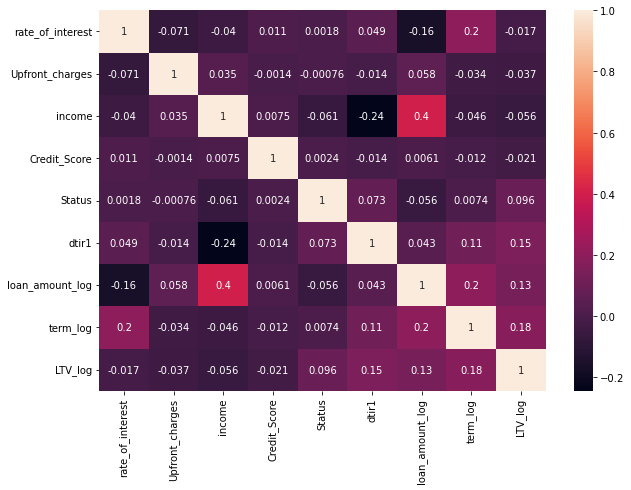

In [37]:
plt.figure(figsize=(10,7))       #correlation matrix
sns.heatmap(df.corr(),annot=True)

In [38]:
X=df.drop("Status",axis=1) # X independent variable(Features) and Y dependent variable(Target)
y=df["Status"]

# Encoding Categorical Variables(One Hot Encoding)

In [39]:
n_unique_values = 10      # encoding categorical variables
all_columns = df.columns.to_list()
categorical_columns = []

for i, column in enumerate(all_columns):
    temp = df.loc[:, column].unique()
    if len(temp) < n_unique_values:
        print (f"{i+1}. {column} has {len(temp)} unique values, which are {temp}") 
        categorical_columns.append(column)
del temp

1. Gender has 4 unique values, which are ['Male' 'Sex Not Available' 'Joint' 'Female']
2. loan_type has 3 unique values, which are ['type1' 'type3' 'type2']
6. credit_type has 4 unique values, which are ['CRIF' 'EXP' 'CIB' 'EQUI']
8. Status has 2 unique values, which are [0 1]


In [40]:
df.isna().sum()

Gender              0
loan_type           0
rate_of_interest    0
Upfront_charges     0
income              0
credit_type         0
Credit_Score        0
Status              0
dtir1               0
loan_amount_log     0
term_log            0
LTV_log             0
dtype: int64

In [41]:
print(categorical_columns)

['Gender', 'loan_type', 'credit_type', 'Status']


In [42]:
cat_col=df[categorical_columns]     #dropping categorical data from dataset
df=df.drop(categorical_columns,axis=1)

In [43]:
cat_col=pd.get_dummies(cat_col) # one hot encoding

In [44]:
cat_col

Status  Gender_Female  Gender_Joint  Gender_Male  \
140346       0              0             0            1   
97327        0              0             0            0   
114279       0              0             0            1   
74224        0              0             1            0   
84539        0              0             1            0   
...        ...            ...           ...          ...   
23931        0              0             0            0   
113883       0              0             0            1   
20313        0              0             0            0   
89847        1              0             0            0   
76212        1              0             0            0   

        Gender_Sex Not Available  loan_type_type1  loan_type_type2  \
140346                         0                1                0   
97327                          1                1                0   
114279                         0                0                0   
74224                          0                1                0   
84539                          0                1                0   
...                          ...              ...              ...   
23931                          1                1                0   
113883                         0                1                0   
20313                          1                1                0   
89847                          1                1                0   
76212                          1                1                0   

        loan_type_type3  credit_type_CIB  credit_type_CRIF  credit_type_EQUI  \
140346                0                0                 1                 0   
97327                 0                0                 0                 0   
114279                1                0                 1                 0   
74224                 0                0                 0                 0   
84539                 0                1                 0                 0   
...                 ...              ...               ...               ...   
23931                 0                1                 0                 0   
113883                0                0                 1                 0   
20313                 0                0                 0                 0   
89847                 0                0                 1                 0   
76212                 0                0                 1                 0   

        credit_type_EXP  
140346                0  
97327                 1  
114279                0  
74224                 1  
84539                 0  
...                 ...  
23931                 0  
113883                0  
20313                 1  
89847                 0  
76212                 0  

[10000 rows x 12 columns]

In [45]:
df_new = pd.concat([df, cat_col], axis=1) # concating the cat columns into original data

In [46]:
#df_new.drop(['ID','year','open_credit','construction_type','Secured_by','total_units'],axis=1,inplace=True)

In [47]:
df_new

rate_of_interest  Upfront_charges        income  Credit_Score  \
140346          4.875000      2544.030000   6600.000000           754   
97327           2.990000      3231.975982   4200.000000           519   
114279          3.125000         0.000000   6927.478965           829   
74224           3.875000      2250.000000  11820.000000           509   
84539           3.500000         0.000000   5520.000000           682   
...                  ...              ...           ...           ...   
23931           4.750000      4419.130000   3420.000000           588   
113883          3.990000      4994.000000   2760.000000           807   
20313           4.875000      3129.600000   2160.000000           898   
89847           4.049837      3231.975982   4860.000000           501   
76212           4.049837      3231.975982   2700.000000           747   

            dtir1  loan_amount_log  term_log   LTV_log  Status  Gender_Female  \
140346  30.000000        12.665079  5.886104  4.569480       0              0   
97327   21.000000        12.022751  5.192957  3.230961       0              0   
114279  37.736328        12.665079  5.886104  4.112518       0              0   
74224   40.000000        12.915339  5.886104  3.677384       0              0   
84539   44.000000        12.755638  5.480639  3.630856       0              0   
...           ...              ...       ...       ...     ...            ...   
23931   48.000000        12.415117  5.886104  4.449572       0              0   
113883  20.000000        12.022751  5.886104  4.382627       0              0   
20313   44.000000        11.575900  5.886104  4.421285       0              0   
89847   42.000000        11.824080  5.886104  4.524283       1              0   
76212   54.000000        12.811754  5.886104  4.019964       1              0   

        Gender_Joint  Gender_Male  Gender_Sex Not Available  loan_type_type1  \
140346             0            1                         0                1   
97327              0            0                         1                1   
114279             0            1                         0                0   
74224              1            0                         0                1   
84539              1            0                         0                1   
...              ...          ...                       ...              ...   
23931              0            0                         1                1   
113883             0            1                         0                1   
20313              0            0                         1                1   
89847              0            0                         1                1   
76212              0            0                         1                1   

        loan_type_type2  loan_type_type3  credit_type_CIB  credit_type_CRIF  \
140346                0                0                0                 1   
97327                 0                0                0                 0   
114279                0                1                0                 1   
74224                 0                0                0                 0   
84539                 0                0                1                 0   
...                 ...              ...              ...               ...   
23931                 0                0                1                 0   
113883                0                0                0                 1   
20313                 0                0                0                 0   
89847                 0                0                0                 1   
76212                 0                0                0                 1   

        credit_type_EQUI  credit_type_EXP  
140346                 0                0  
97327                  0                1  
114279                 0                0  
74224                  0                1  
84539                  0    

In [48]:
cat_col.columns

Index(['Status', 'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'loan_type_type1', 'loan_type_type2',
       'loan_type_type3', 'credit_type_CIB', 'credit_type_CRIF',
       'credit_type_EQUI', 'credit_type_EXP'],
      dtype='object')

In [49]:
df_new.columns

Index(['rate_of_interest', 'Upfront_charges', 'income', 'Credit_Score',
       'dtir1', 'loan_amount_log', 'term_log', 'LTV_log', 'Status',
       'Gender_Female', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'loan_type_type1', 'loan_type_type2',
       'loan_type_type3', 'credit_type_CIB', 'credit_type_CRIF',
       'credit_type_EQUI', 'credit_type_EXP'],
      dtype='object')

In [50]:
df_new

rate_of_interest  Upfront_charges        income  Credit_Score  \
140346          4.875000      2544.030000   6600.000000           754   
97327           2.990000      3231.975982   4200.000000           519   
114279          3.125000         0.000000   6927.478965           829   
74224           3.875000      2250.000000  11820.000000           509   
84539           3.500000         0.000000   5520.000000           682   
...                  ...              ...           ...           ...   
23931           4.750000      4419.130000   3420.000000           588   
113883          3.990000      4994.000000   2760.000000           807   
20313           4.875000      3129.600000   2160.000000           898   
89847           4.049837      3231.975982   4860.000000           501   
76212           4.049837      3231.975982   2700.000000           747   

            dtir1  loan_amount_log  term_log   LTV_log  Status  Gender_Female  \
140346  30.000000        12.665079  5.886104  4.569480       0              0   
97327   21.000000        12.022751  5.192957  3.230961       0              0   
114279  37.736328        12.665079  5.886104  4.112518       0              0   
74224   40.000000        12.915339  5.886104  3.677384       0              0   
84539   44.000000        12.755638  5.480639  3.630856       0              0   
...           ...              ...       ...       ...     ...            ...   
23931   48.000000        12.415117  5.886104  4.449572       0              0   
113883  20.000000        12.022751  5.886104  4.382627       0              0   
20313   44.000000        11.575900  5.886104  4.421285       0              0   
89847   42.000000        11.824080  5.886104  4.524283       1              0   
76212   54.000000        12.811754  5.886104  4.019964       1              0   

        Gender_Joint  Gender_Male  Gender_Sex Not Available  loan_type_type1  \
140346             0            1                         0                1   
97327              0            0                         1                1   
114279             0            1                         0                0   
74224              1            0                         0                1   
84539              1            0                         0                1   
...              ...          ...                       ...              ...   
23931              0            0                         1                1   
113883             0            1                         0                1   
20313              0            0                         1                1   
89847              0            0                         1                1   
76212              0            0                         1                1   

        loan_type_type2  loan_type_type3  credit_type_CIB  credit_type_CRIF  \
140346                0                0                0                 1   
97327                 0                0                0                 0   
114279                0                1                0                 1   
74224                 0                0                0                 0   
84539                 0                0                1                 0   
...                 ...              ...              ...               ...   
23931                 0                0                1                 0   
113883                0                0                0                 1   
20313                 0                0                0                 0   
89847                 0                0                0                 1   
76212                 0                0                0                 1   

        credit_type_EQUI  credit_type_EXP  
140346                 0                0  
97327                  0                1  
114279                 0                0  
74224                  0                1  
84539                  0    

In [51]:
X=df_new.drop("Status",axis=1) # X independent variable(Features) and Y dependent variable(Target)
y=df_new["Status"]

In [52]:
num_col=['loan_amount_log','rate_of_interest','term_log','income','Credit_Score','LTV_log','dtir1']

In [53]:
from sklearn.model_selection import train_test_split # splitting into test and train dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler
sr=StandardScaler()
#scaler.fit(X)
#scaled_data=scaler.transform(X)
X_train.loc[:,num_col]=sr.fit_transform(X_train[num_col])
X_test.loc[:,num_col]=sr.fit_transform(X_test[num_col])

In [55]:
X_train.describe()

rate_of_interest  Upfront_charges        income  Credit_Score  \
count      8.000000e+03      8000.000000  8.000000e+03  8.000000e+03   
mean      -1.194524e-16      3235.065489  1.368905e-16  1.176836e-16   
std        1.000063e+00      2860.554865  1.000063e+00  1.000063e+00   
min       -3.434781e+00         0.000000 -1.018142e+00 -1.741688e+00   
25%       -6.122289e-01      1229.080000 -4.564411e-01 -8.737952e-01   
50%        3.266833e-03      3231.975982 -1.404840e-01  1.128368e-02   
75%        4.141535e-01      3955.250000  1.842496e-01  8.791766e-01   
max        6.315852e+00     53485.780000  4.717408e+01  1.695511e+00   

              dtir1  loan_amount_log      term_log       LTV_log  \
count  8.000000e+03     8.000000e+03  8.000000e+03  8.000000e+03   
mean   2.350938e-17     2.163103e-15 -6.515177e-15 -2.061407e-16   
std    1.000063e+00     1.000063e+00  1.000063e+00  1.000063e+00   
min   -3.425364e+00    -3.542511e+00 -5.408661e+00 -8.071898e+00   
25%   -4.952129e-01    -6.320100e-01  4.085579e-01 -2.896758e-01   
50%    4.354348e-04     7.927160e-02  4.085579e-01  1.624565e-01   
75%    6.559177e-01     7.479445e-01  4.085579e-01  5.903853e-01   
max    2.434938e+00     3.699579e+00  4.085579e-01  1.302628e+01   

       Gender_Female  Gender_Joint  Gender_Male  Gender_Sex Not Available  \
count    8000.000000   8000.000000  8000.000000               8000.000000   
mean        0.186000      0.270375     0.294750                  0.248875   
std         0.389131      0.444181     0.455959                  0.432388   
min         0.000000      0.000000     0.000000                  0.000000   
25%         0.000000      0.000000     0.000000                  0.000000   
50%         0.000000      0.000000     0.000000                  0.000000   
75%         0.000000      1.000000     1.000000                  0.000000   
max         1.000000      1.000000     1.000000                  1.000000   

       loan_type_type1  loan_type_type2  loan_type_type3  credit_type_CIB  \
count      8000.000000      8000.000000      8000.000000      8000.000000   
mean          0.759250         0.149125         0.091625         0.317875   
std           0.427566         0.356234         0.288514         0.465680   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           1.000000         0.000000         0.000000         1.000000   
max           1.000000         1.000000         1.000000         1.000000   

       credit_type_CRIF  credit_type_EQUI  credit_type_EXP  
count       8000.000000       8000.000000      8000.000000  
mean           0.294125          0.102625         0.285375  
std            0.455677          0.303487         0.451621  
min            0.000000          0.000000         0.000000  
25%            0.000000          0.000000         0.000000  
50%            0.000000          0.000000         0.000000  
75%            1.000000          0.000000         1.000000  
max            1.000000          1.000000         1.000000

# Model Building

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA

In [57]:
original_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

C:\Users\libin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.


C:\Users\libin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [58]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 85.50%
                   K-Nearest Neighbors: 97.50%
                         Decision Tree: 100.00%
Support Vector Machine (Linear Kernel): 85.35%
   Support Vector Machine (RBF Kernel): 85.35%
                        Neural Network: 84.80%
                         Random Forest: 100.00%
                     Gradient Boosting: 100.00%


# Hypertuning and Kfold Using LogisticRegression

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
lr=LogisticRegression()
grid={"C":10.0**np.arange(-2,3),"penalty":["l1","l2"]}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [61]:
clf=GridSearchCV(lr,grid,cv=cv,n_jobs=-1,scoring="f1_macro")
clf.fit(X_train,y_train)

C:\Users\libin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\libin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\libin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\libin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [62]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))

[[1515  290]
 [   0  195]]
85.5
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1805
           1       0.40      1.00      0.57       195

    accuracy                           0.85      2000
   macro avg       0.70      0.92      0.74      2000
weighted avg       0.94      0.85      0.88      2000



In [ ]:
from sklearn.linear_model import LogisticRegression
lr=RandomForestClassifier(n_estimators=10)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))


In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba=lr.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

# RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
cl=RandomForestClassifier(n_estimators=10)
cl.fit(X_train,y_train)
y_pred=cl.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))

[[1511    0]
 [   4  485]]
99.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1511
           1       1.00      0.99      1.00       489

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

In [64]:
model=RandomForestClassifier(n_estimators=300,criterion='entropy', # using entropy
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions)*100)
print(classification_report(y_test,predictions))

[[1514    1]
 [   0  485]]
99.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00       485

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# Hypertuning(Gridsearchcv,Randomizedsearchcv)

In [65]:
import numpy as np                                   # Randomizedsearchcv using randomforestclassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [66]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [67]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'gini'}

In [68]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [69]:
best_random_grid=rf_randomcv.best_estimator_

In [70]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1515    0]
 [   0  485]]
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00       485

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [71]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 340,
 'criterion': 'gini'}

In [72]:
from sklearn.model_selection import GridSearchCV # gridsearchcv using randomforestclassifier

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [340], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [73]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [340],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [1800, 1900, 2000, 2100, 2200]},
             verbose=2)

In [74]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=340, max_features='sqrt', min_samples_split=12,
                       n_estimators=1800)

In [75]:
best_grid=grid_search.best_estimator_

In [76]:
best_grid

RandomForestClassifier(max_depth=340, max_features='sqrt', min_samples_split=12,
                       n_estimators=1800)

In [77]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1515    0]
 [   0  485]]
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00       485

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier     # knn model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)*100))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1466   49]
 [   1  484]]
Accuracy Score 97.5
Classification report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1515
           1       0.91      1.00      0.95       485

    accuracy                           0.97      2000
   macro avg       0.95      0.98      0.97      2000
weighted avg       0.98      0.97      0.98      2000



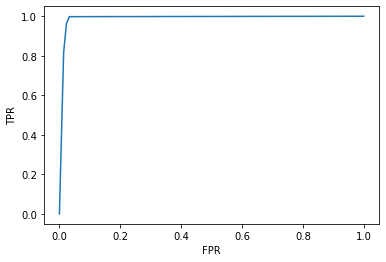

In [79]:
from sklearn.metrics import roc_curve
y_pred_proba=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9895838862236739

# DecisionTreeClassifier

In [81]:
from sklearn.tree import DecisionTreeClassifier 
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)*100))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1515    0]
 [   0  485]]
Accuracy Score 100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00       485

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



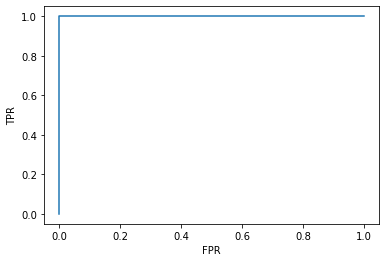

In [82]:
from sklearn.metrics import roc_curve     #roc-curve
y_pred_proba=dt.predict_proba(X_test)[:,1]   
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

1.0

# GradientBoostingClassifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=17,max_depth=12)
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)*100))
print("Classification report: {}".format(classification_report(y_test,y_pred)))


[[1515    0]
 [   0  485]]
1.0
Accuracy Score 100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00       485

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



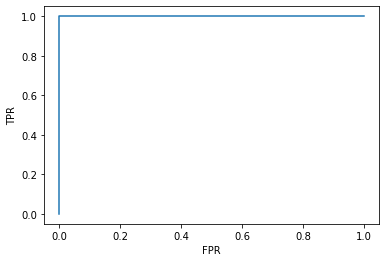

In [85]:
from sklearn.metrics import roc_curve
y_pred_proba=gbc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [86]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

1.0

# PCA(Principal Component Analysis)

In [87]:
num_col=['loan_amount_log','rate_of_interest','term_log','income','Credit_Score','LTV_log','dtir1']

# Standard Scaler

In [88]:
from sklearn.preprocessing import StandardScaler
sr=StandardScaler()

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [90]:
X_train.loc[:,num_col]=sr.fit_transform(X_train[num_col])
X_test.loc[:,num_col]=sr.fit_transform(X_test[num_col])

In [91]:
n_components = 2  #here,selecting n-components=2

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [92]:
X_train_reduced.shape

(8000, 2)

In [93]:

X_train_reduced

PC1       PC2
70945   2977.684518  1.258762
104148  1841.184486 -0.483942
1803      -3.089495  0.603817
126480 -3235.065433  1.781533
30456    389.934460 -1.962972
...             ...       ...
39178     -3.089494  1.426590
5909      -3.089557 -1.076645
128549 -3235.065596 -1.525951
26533     -3.089607 -1.914094
48216     -3.089458  0.903452

[8000 rows x 2 columns]

In [94]:
pca.explained_variance_ratio_*100

array([9.99998920e+01, 1.83438243e-05])

In [95]:
import plotly.express as px

In [96]:
fig = px.bar(                      #plotting the pca using n=2
    x=["PC" + str(i) for i in range(1, n_components + 1)],
    y=pca.explained_variance_ratio_,
    labels={'x': "Principal Component", 'y': "Variance Ratio"},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0, 'lightblue'), (1, 'darkblue')],
    title="Proportion of Variance in Principal Components"
)

fig.show()


In [97]:
reduced_models = {                                              #reduced models accuracy
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}
for name, model in reduced_models.items():
    model.fit(X_train_reduced, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.


C:\Users\libin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report                                                         # RandomForestClassifier
cl=RandomForestClassifier(n_estimators=10)
cl.fit(X_train_reduced,y_train)
y_pred=cl.predict(X_test_reduced)
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100)
print(classification_report(y_pred,y_test))

[[1459   13]
 [  56  472]]
96.55
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1472
           1       0.97      0.89      0.93       528

    accuracy                           0.97      2000
   macro avg       0.97      0.94      0.95      2000
weighted avg       0.97      0.97      0.97      2000



In [99]:
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train_reduced,y_train)
y_pred=dt.predict(X_test_reduced)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)*100))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1462   53]
 [  33  452]]
Accuracy Score 95.7
Classification report:               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1515
           1       0.90      0.93      0.91       485

    accuracy                           0.96      2000
   macro avg       0.94      0.95      0.94      2000
weighted avg       0.96      0.96      0.96      2000



In [100]:
from sklearn.neighbors import KNeighborsClassifier     # knn model
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_reduced,y_train)
y_pred=knn.predict(X_test_reduced)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)*100))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1453   62]
 [   1  484]]
Accuracy Score 96.85000000000001
Classification report:               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1515
           1       0.89      1.00      0.94       485

    accuracy                           0.97      2000
   macro avg       0.94      0.98      0.96      2000
weighted avg       0.97      0.97      0.97      2000



In [101]:
from sklearn.ensemble import GradientBoostingClassifier   #GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=17,max_depth=12)
gbc.fit(X_train_reduced, y_train)
y_pred=gbc.predict(X_test_reduced)
print(confusion_matrix(y_test,y_pred))

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)*100))
print("Classification report: {}".format(classification_report(y_test,y_pred)))


[[1457   58]
 [  12  473]]
Accuracy Score 96.5
Classification report:               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1515
           1       0.89      0.98      0.93       485

    accuracy                           0.96      2000
   macro avg       0.94      0.97      0.95      2000
weighted avg       0.97      0.96      0.97      2000



In [102]:
reduced_results = []    #reduced results

for name, model in reduced_models.items():
    result = model.score(X_test_reduced, y_test)
    reduced_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

                   Logistic Regression: 75.75%
                   K-Nearest Neighbors: 96.80%
                         Decision Tree: 95.75%
Support Vector Machine (Linear Kernel): 63.20%
   Support Vector Machine (RBF Kernel): 89.05%
                        Neural Network: 95.45%
                         Random Forest: 96.70%
                     Gradient Boosting: 97.00%


# Change in Model Performance After Dimensionality Reduction

In [103]:
fig = px.bar(
    x=np.subtract(reduced_results, original_results),
    y=original_models.keys(),
    orientation='h',
    labels={'x': "Change in Performance", 'y': "Model"},
    color=np.subtract(reduced_results, original_results),
    color_continuous_scale=[(0, 'red'), (1, 'blue')],
    title="Change in Model Performance After Dimensionality Reduction"
)

fig.show()


# Save the Model (Using Pickle File)

In [104]:
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)*100))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[1515    0]
 [   0  485]]
Accuracy Score 100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       1.00      1.00      1.00       485

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [105]:
dt2= DecisionTreeClassifier ()
dt2.fit(X,y)

DecisionTreeClassifier()

In [106]:
import pickle
pickle.dump(dt2,open("dt_model10.pkl","wb"))